In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset
import scipy 
import ast

In [3]:
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df["job_posted_date"]=pd.to_datetime(df['job_posted_date'])

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Cornelius\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Sat Aug  3 02:06:02 2024).


In [4]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [6]:
df['job_work_from_home'].value_counts()

job_work_from_home
False    716189
True      69552
Name: count, dtype: int64

Text(0, 0.5, '')

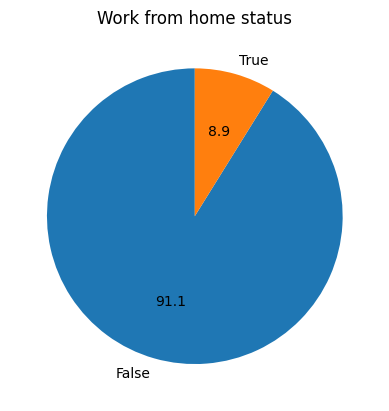

In [13]:
df['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.title('Work from home status')
plt.ylabel('')

Text(0, 0.5, '')

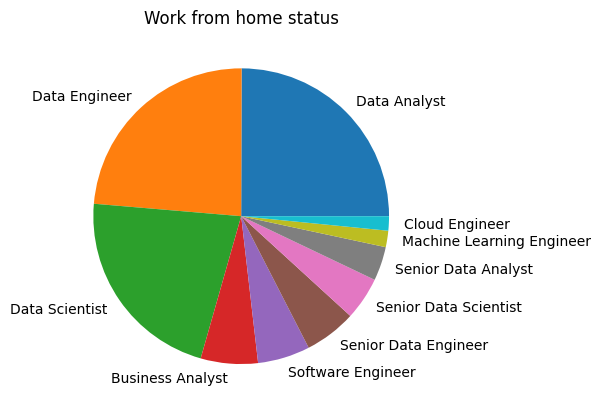

In [10]:
df['job_title_short'].value_counts().plot(kind='pie')
plt.title('Work from home status')
plt.ylabel('')


In [16]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


([<matplotlib.patches.Wedge at 0x2277c346a20>,
 [Text(-0.3019679244835003, -1.0577406925060258, ''),
  Text(0.3019679492417087, 1.057740685437956, '')],
 [Text(-0.16470977699100015, -0.5769494686396504, '91.15%'),
  Text(0.1647097904954775, 0.5769494647843396, '8.85%')])

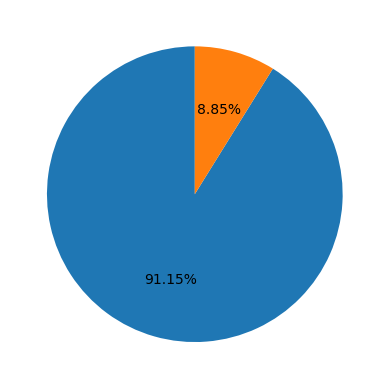

In [19]:
fig,ax=plt.subplots()
ax.pie(df['job_work_from_home'].value_counts(), startangle=90,autopct="%1.2f%%")

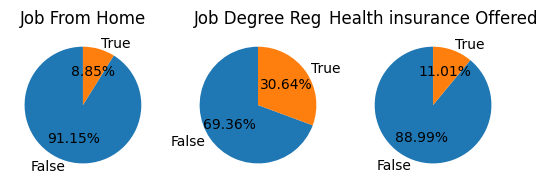

In [32]:

dic_column={
    'job_work_from_home':'Job From Home',
    'job_no_degree_mention':'Job Degree Reg',
    'job_health_insurance':'Health insurance Offered'
}
fig,ax=plt.subplots(1,3)
fig.set_size_inches((12,5))
for i,(column,title) in enumerate(dic_column.items()):
 ax[i].pie(df[column].value_counts(), startangle=90,autopct="%1.2f%%",labels=['False','True'])
 ax[i].set_title(title)
plt.show()